# **Online Retail Transactions Visualisation**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\fanxi\\OneDrive\\Documents\\Code projects\\Hackathon-group4\\online-retail-transactions-analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\fanxi\\OneDrive\\Documents\\Code projects\\Hackathon-group4\\online-retail-transactions-analysis'

---

# Initial Setup

Import neccessary python libaries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Fetch dataset from compressed csv file

In [63]:
df = pd.read_csv("DataSet/Cleaned/fact_sales_clean.zip", compression='zip')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,ProductCategory,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Home-Light,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Home-Light,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Drinkware,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Bottles,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Romance,Wednesday,8


---

# Descriptive Statistics

Section 1 content

In [64]:
print("DataFrame Info:")
df.info()

print("\nDataFrame Shape:")
print(df.shape)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534684 entries, 0 to 534683
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   InvoiceNo        534684 non-null  object 
 1   StockCode        534684 non-null  object 
 2   Description      534684 non-null  object 
 3   Quantity         534684 non-null  int64  
 4   InvoiceDate      534684 non-null  object 
 5   UnitPrice        534684 non-null  float64
 6   CustomerID       534684 non-null  int64  
 7   Country          534684 non-null  object 
 8   TotalSales       534684 non-null  float64
 9   ProductCategory  534684 non-null  object 
 10  DayOfWeek        534684 non-null  object 
 11  Hour             534684 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 49.0+ MB

DataFrame Shape:
(534684, 12)


"InvoiceDate" has a object dtype. Would be better to convert to datetime

In [23]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534684 entries, 0 to 534683
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        534684 non-null  object        
 1   StockCode        534684 non-null  object        
 2   Description      534684 non-null  object        
 3   Quantity         534684 non-null  int64         
 4   InvoiceDate      534684 non-null  datetime64[ns]
 5   UnitPrice        534684 non-null  float64       
 6   CustomerID       534684 non-null  int64         
 7   Country          534684 non-null  object        
 8   TotalSales       534684 non-null  float64       
 9   ProductCategory  534684 non-null  object        
 10  DayOfWeek        534684 non-null  object        
 11  Hour             534684 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 49.0+ MB


In [66]:
print("Numeric Columns Summary:")
print(df.describe())

Numeric Columns Summary:
            Quantity      UnitPrice     CustomerID     TotalSales  \
count  534684.000000  534684.000000  534684.000000  534684.000000   
mean        9.673600       4.646824   15283.334714      18.178914   
std       219.161905      97.410535    1484.752941     381.350895   
min    -80995.000000  -11062.060000   12346.000000 -168469.600000   
25%         1.000000       1.250000   14357.000000       3.750000   
50%         3.000000       2.080000   15287.000000       9.900000   
75%        10.000000       4.130000   16244.000000      17.400000   
max     80995.000000   38970.000000   18287.000000  168469.600000   

                Hour  
count  534684.000000  
mean       13.075319  
std         2.447477  
min         6.000000  
25%        11.000000  
50%        13.000000  
75%        15.000000  
max        20.000000  


In [67]:
print("\nCategorical Columns Summary:")
print(df.describe(include="object"))


Categorical Columns Summary:
       InvoiceNo StockCode                         Description  \
count     534684    534684                              534684   
unique     24428      3958                                4211   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2301                                2357   

                InvoiceDate         Country ProductCategory DayOfWeek  
count                534684          534684          534684    534684  
unique                22294              36              30         6  
top     2011-10-31 14:41:00  United Kingdom       Gift-Wrap  Thursday  
freq                   1114          488846          105496    102529  


In [61]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col} has {df[col].nunique()} unique values')

InvoiceNo has 24428 unique values
StockCode has 3958 unique values
Description has 4211 unique values
Country has 36 unique values
ProductCategory has 30 unique values
DayOfWeek has 6 unique values


---

# Trend Analysis

Section 2 content

In [32]:
df_daily = (
    df
    .groupby(df['InvoiceDate'].dt.date)
    .agg({'TotalSales': 'sum',
          'InvoiceNo': 'count',
          'CustomerID': 'nunique'})
    .rename(columns={'TotalSales': 'Sales',
                     'InvoiceNo': 'TransactionsCount',
                     'CustomerID': 'UniqueCustomersCount'})
    .reset_index()
)
df_daily

,InvoiceDate,Sales,TransactionsCount,UniqueCustomersCount
0,2010-12-01,58451.56,3054,99
1,2010-12-02,46088.32,2066,118
2,2010-12-03,45575.38,2155,56
3,2010-12-05,30973.63,2620,77
4,2010-12-06,53653.87,3820,91
...,...,...,...,...
300,2011-12-05,57630.20,5290,115
301,2011-12-06,54109.39,3312,129
302,2011-12-07,74952.61,2401,102
303,2011-12-08,81294.33,4905,121


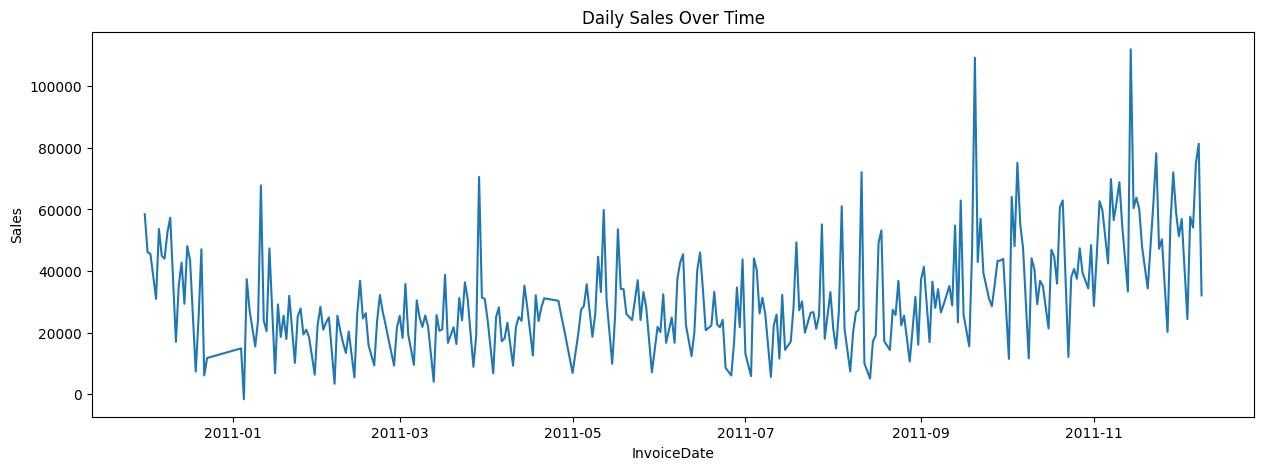

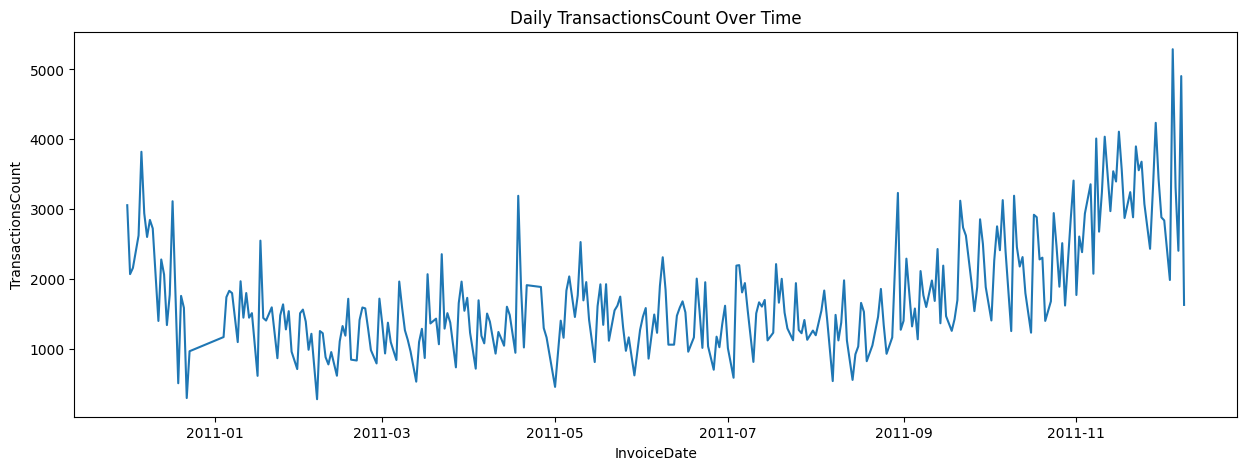

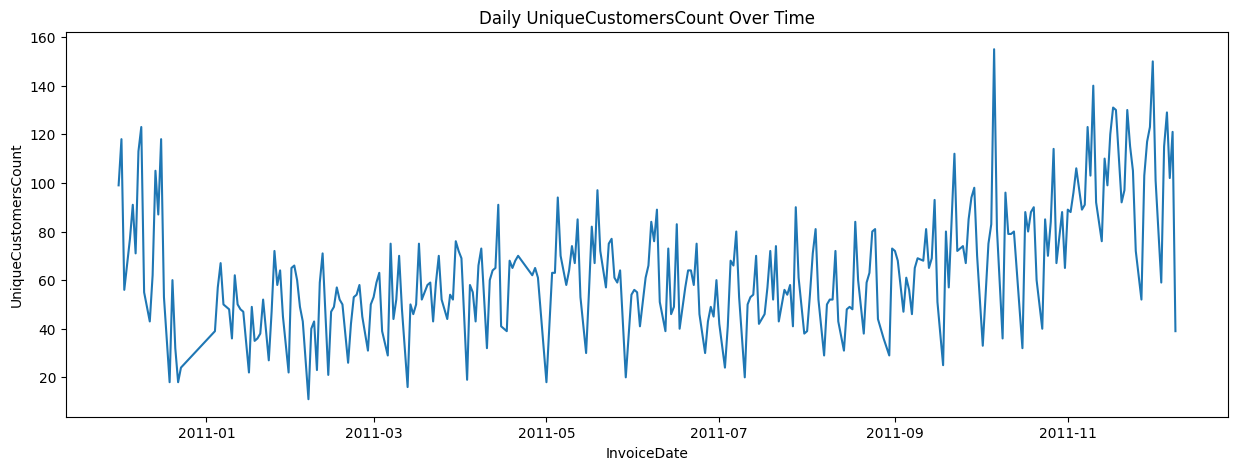

In [33]:
for col in df_daily.columns[1:]:
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=df_daily, x='InvoiceDate', y=col)
    plt.title(f'Daily {col} Over Time')
    plt.show()

In [49]:
df_weekdays = (
    df.groupby(df['DayOfWeek'])
    .agg(TotalSales = ('TotalSales', 'sum'),
          AverageSales = ('TotalSales', 'mean'))
    .reset_index()
)
df_weekdays

,DayOfWeek,TotalSales,AverageSales
0,Friday,1537055.891,18.959848
1,Monday,1583834.391,16.812101
2,Sunday,798272.411,12.713976
3,Thursday,2106396.810,20.544400
4,Tuesday,1964659.531,19.507313
5,Wednesday,1729755.230,18.524425


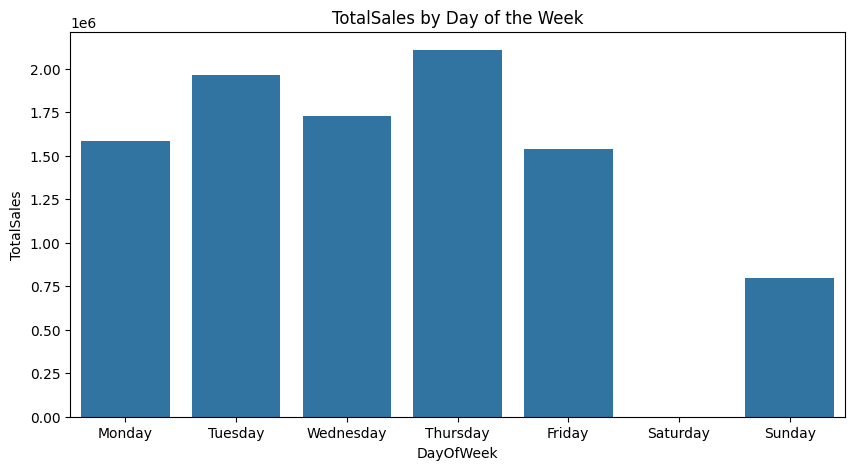

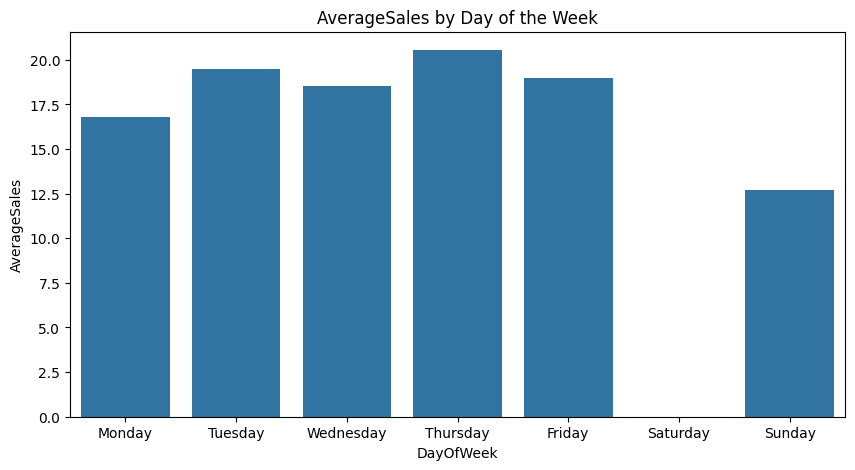

In [50]:
for col in df_weekdays.columns[1:]:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_weekdays, x='DayOfWeek', y=col, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.title(f'{col} by Day of the Week')
    plt.show()

---

# Customer Segmentation

---

# Product Analysis

---

# Geographic Analysis

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
